In [0]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Sequential

In [0]:
batch_size = 64
epochs = 15
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
NUM_CLASSES = 10

In [122]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
conv_base = MobileNet(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,3),
                         include_top = False, weights = None)

In [0]:
conv_base.trainable = True

In [0]:
model = Sequential()

model.add(conv_base)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [0]:
optimizer = keras.optimizers.Adam()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [131]:
history = model.fit(x_train,y_train,
                  batch_size = batch_size,
                  epochs = epochs,
                  validation_data = (x_test,y_test),
                  shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 35s 708us/step - loss: 1.8468 - accuracy: 0.3067 - val_loss: 1.6952 - val_accuracy: 0.3775
Epoch 2/15
50000/50000 [==============================] - 30s 593us/step - loss: 1.4735 - accuracy: 0.4577 - val_loss: 1.4547 - val_accuracy: 0.4885
Epoch 3/15
50000/50000 [==============================] - 29s 589us/step - loss: 1.2940 - accuracy: 0.5340 - val_loss: 1.4856 - val_accuracy: 0.5038
Epoch 4/15
50000/50000 [==============================] - 30s 600us/step - loss: 1.1719 - accuracy: 0.5839 - val_loss: 1.3585 - val_accuracy: 0.5519
Epoch 5/15
50000/50000 [==============================] - 30s 591us/step - loss: 1.0692 - accuracy: 0.6215 - val_loss: 1.1566 - val_accuracy: 0.6139
Epoch 6/15
50000/50000 [==============================] - 30s 596us/step - loss: 0.9861 - accuracy: 0.6561 - val_loss: 1.1004 - val_accuracy: 0.6294
Epoch 7/15
50000/50000 [==============================] 

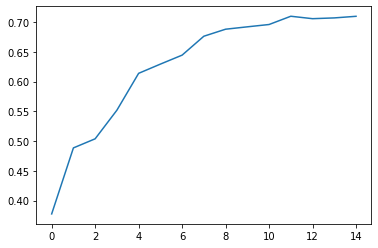

In [132]:
val_acc = history.history['val_accuracy']

plt.plot(range(15),val_acc)
plt.show()

In [71]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 244us/step
Test loss: 0.9542177631378174
Test accuracy: 0.7057999968528748
